In [47]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score

In [2]:
# Loading the data
data_df = pd.read_csv('heart_v2.csv')

In [3]:
data_df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
X = data_df.drop('heart disease',axis=1)
y = data_df['heart disease']

In [5]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)
print(X_train.shape)
print(X_test.shape)

(189, 4)
(81, 4)


### Random Forest Classifier:

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
# n_estimators is the number of trees we want in the random forest
rf = RandomForestClassifier(random_state=42,n_estimators=10,max_depth=3)

In [8]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [9]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [10]:
sample_tree = rf.estimators_[4]

In [11]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [12]:
def evaluate_model(dt_classifier):
    print('Train Accuracy:',accuracy_score(y_train,dt_classifier.predict(X_train)))
    print('Train Confussion Matrix:')
    print(confusion_matrix(y_train,dt_classifier.predict(X_train)))
    print("-"*50)
    print('Test Accuracy:',accuracy_score(y_test,dt_classifier.predict(X_test)))
    print('Test Confussion Matrix:')
    print(confusion_matrix(y_test,dt_classifier.predict(X_test)))

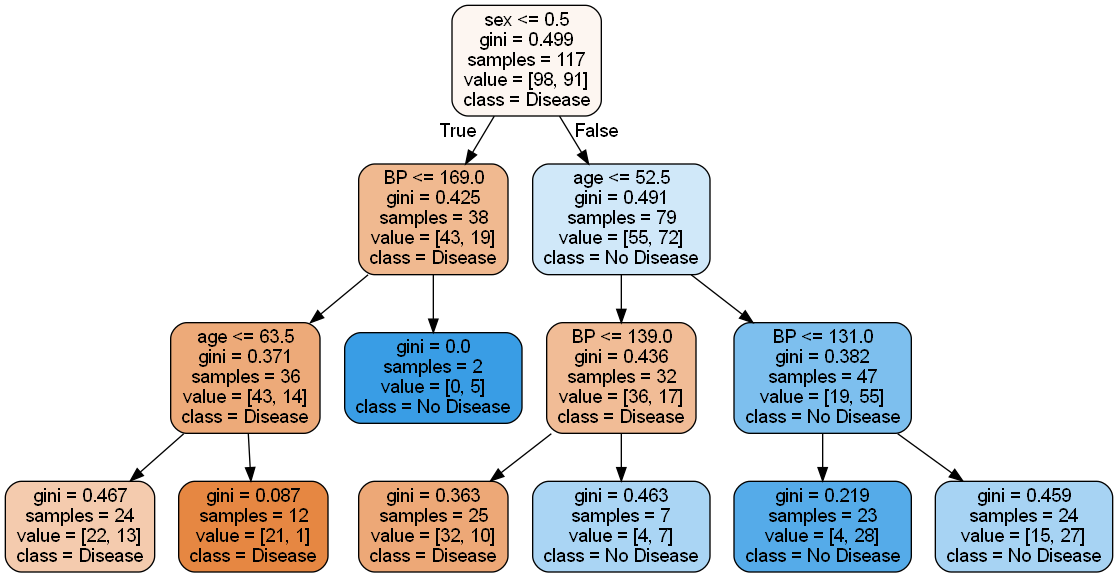

In [13]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png(), width=700, height=700)

In [16]:
evaluate_model(rf)

Train Accuracy: 0.7407407407407407
Train Confussion Matrix:
[[80 21]
 [28 60]]
--------------------------------------------------
Test Accuracy: 0.6172839506172839
Test Confussion Matrix:
[[35 14]
 [17 15]]


#### OOB Score:

In [17]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3,oob_score=True)

In [18]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [19]:
rf.oob_score_

0.6349206349206349

#### Grid search for hyper-parameter tuning:

In [20]:
from sklearn.model_selection import GridSearchCV
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [21]:
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [24]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [29]:
%%time
grid_search.fit(X, y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
Wall time: 2min 11s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [30]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [31]:
rf_best = grid_search.best_estimator_

In [32]:
evaluate_model(rf_best)

Train Accuracy: 0.8042328042328042
Train Confussion Matrix:
[[87 14]
 [23 65]]
--------------------------------------------------
Test Accuracy: 0.8024691358024691
Test Confussion Matrix:
[[42  7]
 [ 9 23]]


In [33]:
sample_tree = rf_best.estimators_[0]

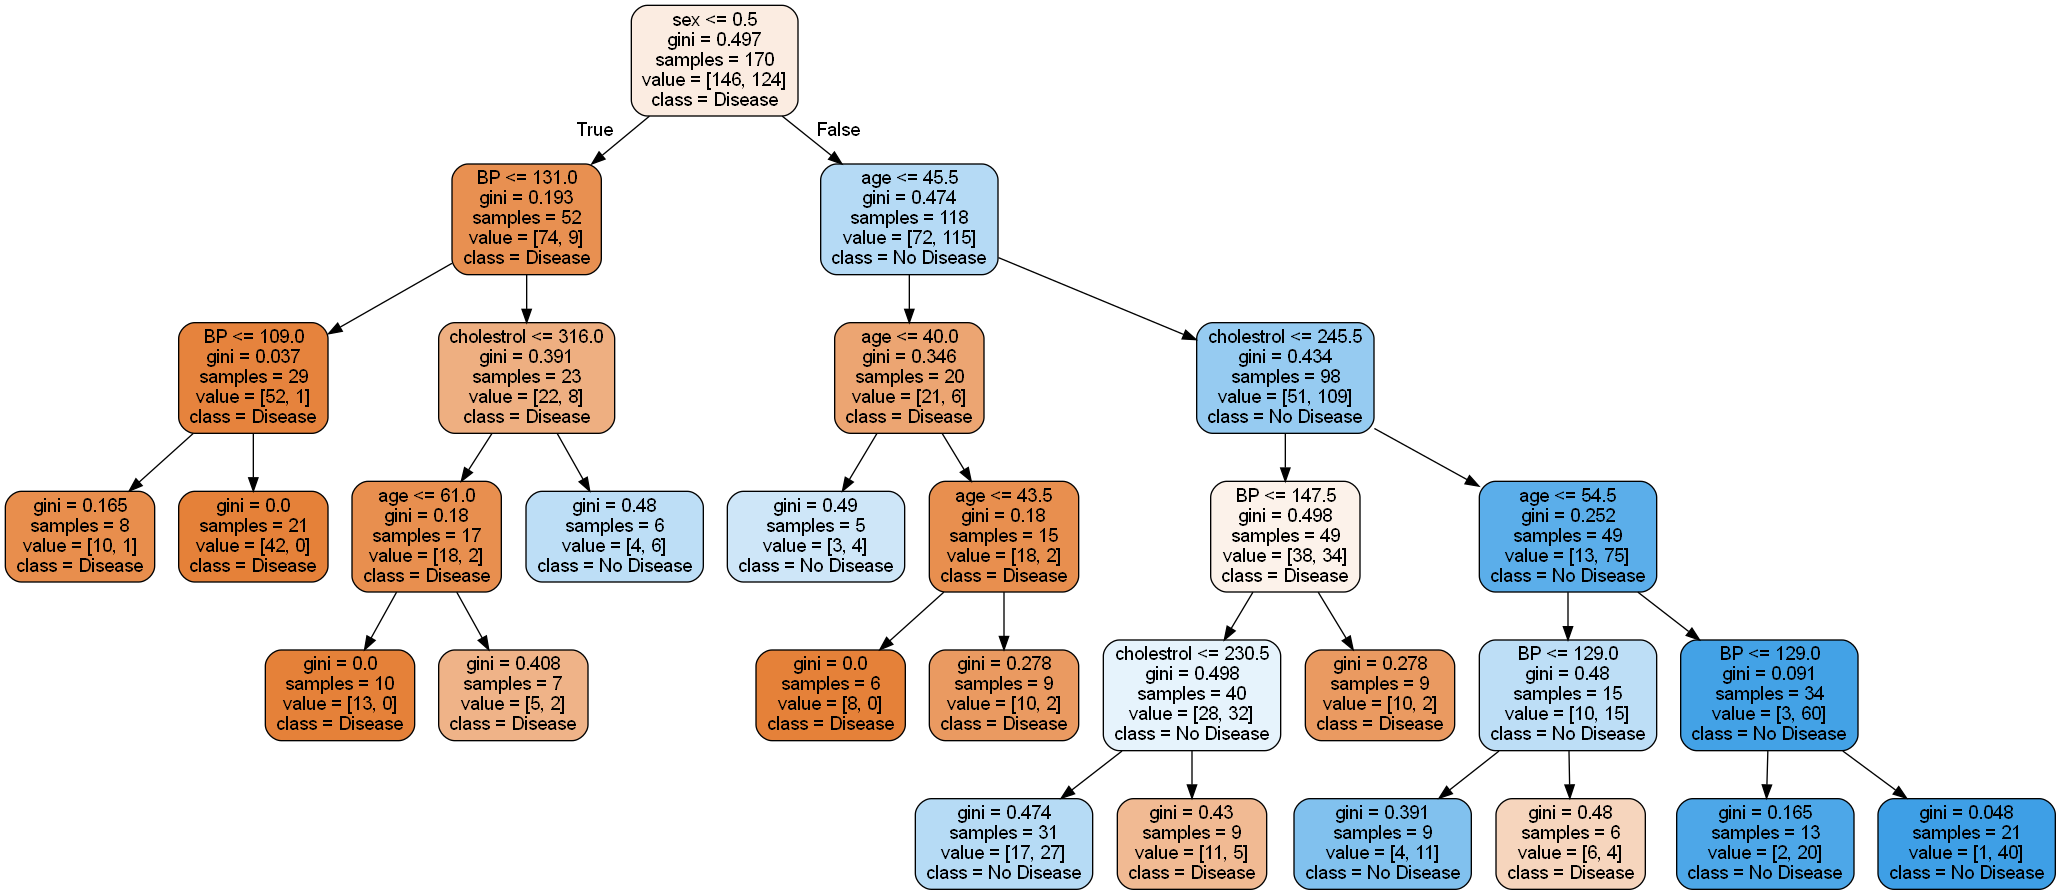

In [34]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

#### Variable importance in RandomForest and Decision trees:

In [35]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [36]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [37]:
classifier_rf.feature_importances_

array([0.37539743, 0.13780788, 0.20834585, 0.27844883])

In [38]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [39]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.375397
3,cholestrol,0.278449
2,BP,0.208346
1,sex,0.137808


### Random Forest Regressor:

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf = RandomForestRegressor(max_depth=5, n_jobs=-1, min_samples_leaf=10, random_state=42)

In [42]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                      random_state=42)

In [43]:
sample_tree = rf.estimators_[10]

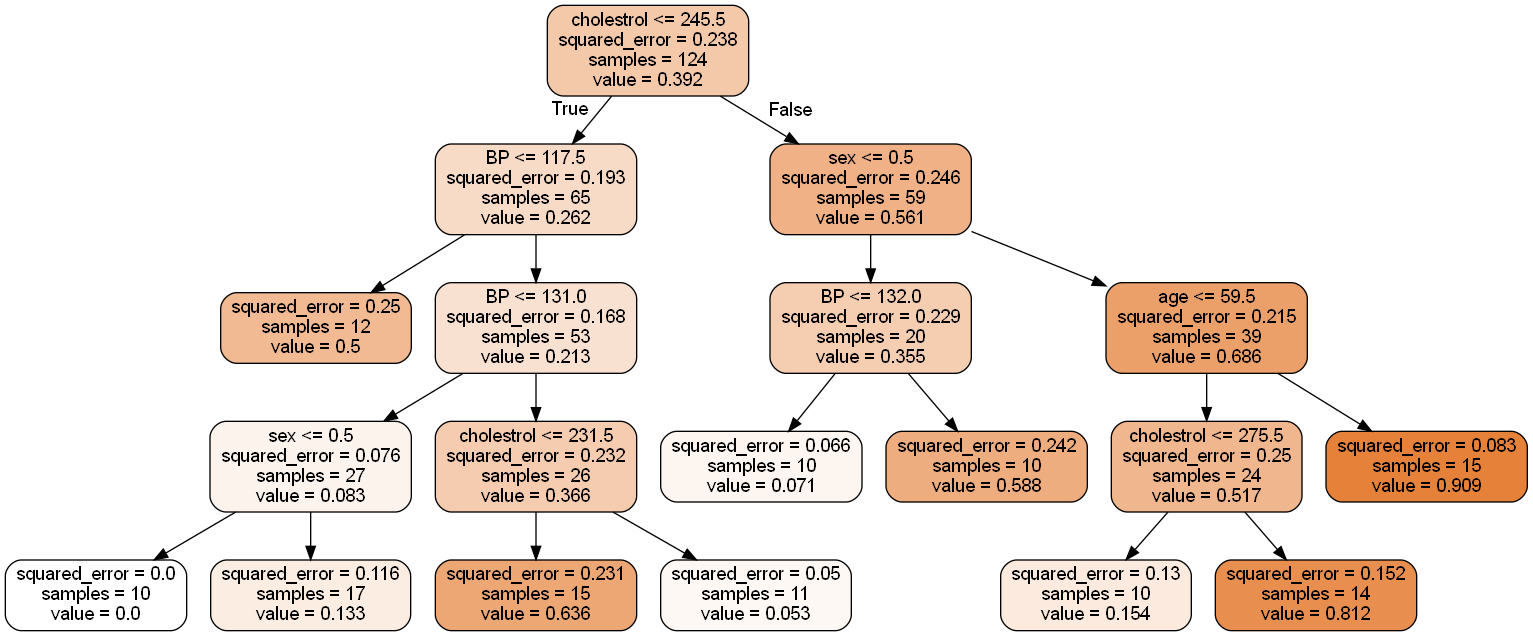

In [44]:
dot_data = StringIO()
export_graphviz(sample_tree, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [45]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [49]:
r2_score(y_train,y_train_pred)

0.32892375355749437

In [51]:
rf.feature_importances_

array([0.42496669, 0.22829276, 0.11705993, 0.22968062])

In [52]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [53]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.375397
3,cholestrol,0.278449
2,BP,0.208346
1,sex,0.137808
